# Traffic sign recognition with tensorflow

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical 

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import scipy.ndimage as ndimage

import time

### Loading in data

In [4]:
test = np.load('data/test.npz')
train = np.load('data/train.npz')
validation = np.load('data/validation.npz')
unique_labels = np.unique(train['labels'])
#unique labels needed for confusion matrix
print(unique_labels)
num_cat = len(unique_labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


### Test dataset

In [ ]:
insp_test = 0
x_test = test['images']
x_test = x_test/255.0
y_test = test['labels']
#y_test = pd.get_dummies(y_test).values
print("Category: " + str(y_test[insp_test]))
plt.imshow(x_test[insp_test])

### Train dataset

Category: 41


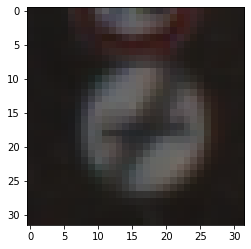

In [6]:
insp_train = 0
x_train = train['images']
x_train = x_train/255.0
y_train = train['labels']
#y_train = pd.get_dummies(y_train).values
print("Category: " + str(y_train[insp_train]))
plt.imshow(x_train[insp_train])

### Validation dataset

Category: 41


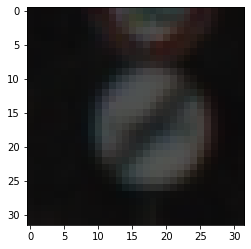

In [7]:
insp_validation = 0
x_validation = validation['images']
x_validation = x_validation/255.0
y_validation = validation['labels']
#y_validation = pd.get_dummies(y_validation).values
print("Category: " + str(y_validation[insp_validation]))
plt.imshow(x_validation[insp_validation])

In [8]:
y_test = to_categorical(y_test, num_cat)
y_train = to_categorical(y_train, num_cat)
y_validation = to_categorical(y_validation,num_cat)

## Learning rate influence

### Default learning rate (0.001)

In [9]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5),strides=(1, 1),padding='valid',input_shape=(32,32,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),strides=(2,2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2),strides=(2,2)),
    tf.keras.layers.Flatten(),#todo?
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(43),
])

In [10]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
start = time.time()
history = model1.fit(x_train, y_train, epochs=20, validation_data=(x_validation, y_validation),batch_size=32)
end = time.time()
print("Learning time: " + str(end - start))


Epoch 1/20
1088/1088 [==============================] - 18s 16ms/step - loss: 1.3156 - accuracy: 0.6443 - val_loss: 0.6847 - val_accuracy: 0.8098

KeyboardInterrupt: 

In [ ]:
start = time.time()
predictions = model1.predict(x_test)
end = time.time()
print("Prediction time: " + str(end - start))

In [ ]:
resultsPred = []
resultsReal = []
for i in range(len(predictions)):
    resultsPred.append(np.argmax(predictions[i]))
    resultsReal.append(np.argmax(y_test[i]))

In [ ]:
mat = confusion_matrix(resultsPred, resultsReal)
plot_confusion_matrix(conf_mat = mat, figsize=(15,15), class_names=unique_labels)

### Learning rate == 0.01

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5),strides=(1, 1),padding='valid',input_shape=(32,32,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),strides=(2,2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2),strides=(2,2)),
    tf.keras.layers.Flatten(),#todo?
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(43),
])

In [ ]:
model2.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
start = time.time()
history = model2.fit(x_train, y_train, epochs=20, validation_data=(x_validation, y_validation),batch_size=32)
end = time.time()
print("Learning time: " + str(end - start))

In [ ]:
start = time.time()
predictions = model2.predict(x_test)
end = time.time()
print("Prediction time: " + str(end - start))

In [ ]:
resultsPred = []
resultsReal = []
for i in range(len(predictions)):
    resultsPred.append(np.argmax(predictions[i]))
    resultsReal.append(np.argmax(y_test[i]))

In [ ]:
mat = confusion_matrix(resultsPred, resultsReal)
plot_confusion_matrix(conf_mat = mat, figsize=(15,15), class_names=unique_labels)

### Learning rate == 0.0001

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5),strides=(1, 1),padding='valid',input_shape=(32,32,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),strides=(2,2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2),strides=(2,2)),
    tf.keras.layers.Flatten(),#todo?
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(43),
])

In [ ]:
model3.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
start = time.time()
history = model3.fit(x_train, y_train, epochs=20, validation_data=(x_validation, y_validation),batch_size=32)
end = time.time()
print("Learning time: " + str(end - start))

In [ ]:
start = time.time()
predictions = model3.predict(x_test)
end = time.time()
print("Prediction time: " + str(end - start))

In [ ]:
resultsPred = []
resultsReal = []
for i in range(len(predictions)):
    resultsPred.append(np.argmax(predictions[i]))
    resultsReal.append(np.argmax(y_test[i]))

In [ ]:
mat = confusion_matrix(resultsPred, resultsReal)
plot_confusion_matrix(conf_mat = mat, figsize=(15,15), class_names=unique_labels)

## Using gaussian filters to spoil the test images

In [ ]:
g1 = []
g2 = []
g3 = []
g4 = []
for i in range(len(x_test)):
    g1.append(ndimage.gaussian_filter(x_test[i], sigma=1))
    g2.append(ndimage.gaussian_filter(x_test[i], sigma=1.5))
    g3.append(ndimage.gaussian_filter(x_test[i], sigma=2))
    g4.append(ndimage.gaussian_filter(x_test[i], sigma=2.5))
g1 = np.array(g1)
g2 = np.array(g2)
g3 = np.array(g3)
g4 = np.array(g4)

In [ ]:
plt.title('original')
plt.imshow(x_test[0])

In [ ]:
plt.title('1x1 GF')
plt.imshow(g1[0])

In [ ]:
plt.title('1.5x1.5 GF')
plt.imshow(g2[0])

In [ ]:
plt.title('2x2 GF')
plt.imshow(g3[0])

In [ ]:
plt.title('2.5x2.5 GF')
plt.imshow(g4[0])

### 1x1 window

In [ ]:
start = time.time()
predictions = model1.predict(g1)
end = time.time()
print("Prediction time: " + str(end - start))

In [ ]:
resultsPred = []
resultsReal = []
for i in range(len(predictions)):
    resultsPred.append(np.argmax(predictions[i]))
    resultsReal.append(np.argmax(y_test[i]))

In [ ]:
mat = confusion_matrix(resultsPred, resultsReal)
plot_confusion_matrix(conf_mat = mat, figsize=(15,15), class_names=unique_labels)

### 1.5x1.5 window

In [ ]:
start = time.time()
predictions = model1.predict(g2)
end = time.time()
print("Prediction time: " + str(end - start))

In [ ]:
resultsPred = []
resultsReal = []
for i in range(len(predictions)):
    resultsPred.append(np.argmax(predictions[i]))
    resultsReal.append(np.argmax(y_test[i]))

In [ ]:
mat = confusion_matrix(resultsPred, resultsReal)
plot_confusion_matrix(conf_mat = mat, figsize=(15,15), class_names=unique_labels)

### 2x2 window

In [ ]:
start = time.time()
predictions = model1.predict(g3)
end = time.time()
print("Prediction time: " + str(end - start))

In [ ]:
resultsPred = []
resultsReal = []
for i in range(len(predictions)):
    resultsPred.append(np.argmax(predictions[i]))
    resultsReal.append(np.argmax(y_test[i]))

In [ ]:
mat = confusion_matrix(resultsPred, resultsReal)
plot_confusion_matrix(conf_mat = mat, figsize=(15,15), class_names=unique_labels)

### 2.5x2.5 window

In [ ]:
start = time.time()
predictions = model1.predict(g4)
end = time.time()
print("Prediction time: " + str(end - start))

In [ ]:
resultsPred = []
resultsReal = []
for i in range(len(predictions)):
    resultsPred.append(np.argmax(predictions[i]))
    resultsReal.append(np.argmax(y_test[i]))

In [ ]:
mat = confusion_matrix(resultsPred, resultsReal)
plot_confusion_matrix(conf_mat = mat, figsize=(15,15), class_names=unique_labels)

## Learning effect with grayscale images

In [ ]:
import cv2

#### Convert from shape (32,32) to (32,32,1) (or else it wont work...)

In [ ]:
gTrain = []
gValidate = []
for i in range(len(x_train)):
    #gTrain.append(color.rgb2gray(x_train[i]))
    gTrain.append(cv2.cvtColor(np.float32(x_train[i]), cv2.COLOR_BGR2GRAY))
for i in range(len(x_validation)):
    #gValidate.append(color.rgb2gray(x_validation[i]))
    gValidate.append(cv2.cvtColor(np.float32(x_validation[i]), cv2.COLOR_BGR2GRAY))
gTrain = np.array(gTrain)
gValidate = np.array(gValidate)

#### Convert from shape (32,32) to (32,32,1) (or else it wont work...)

In [ ]:
x_train_gr = []
for i in range(len(gTrain)):#for every picture
    x_dim = []
    for j in range(len(gTrain[i])): #for every X
        y_dim = []
        for k in range(len(gTrain[i][j])): #for every Y
            z_dim = []
            z_dim.append(gTrain[i][j][k])
            y_dim.append(z_dim)
        x_dim.append(y_dim)
    x_train_gr.append(x_dim)
print("Conversion done")

In [ ]:
plt.imshow(x_train_gr[0])

In [ ]:
x_validation_gr = []
for i in range(len(gValidate)):#for every picture
    x_dim = []
    for j in range(len(gValidate[i])): #for every X
        y_dim = []
        for k in range(len(gValidate[i][j])): #for every Y
            z_dim = []
            z_dim.append(gValidate[i][j][k])
            y_dim.append(z_dim)
        x_dim.append(y_dim)
    x_validation_gr.append(x_dim)
print("Conversion done")

In [ ]:
x_train_gr = np.array(x_train_gr)
x_validation_gr = np.array(x_validation_gr)
gTrain = None
gValidate = None

In [ ]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5),strides=(1, 1),padding='valid',input_shape=(32,32,1),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),strides=(2,2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2),strides=(2,2)),
    tf.keras.layers.Flatten(),#todo?
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(43),
])

In [ ]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
start = time.time()
history = model4.fit(x_train_gr, y_train, epochs=20, validation_data=(x_validation_gr, y_validation),batch_size=32)
end = time.time()
print("Learning time: " + str(end - start))

## Time to learn and predict 1 image:

In [ ]:
one_train_x = []
one_train_x.append(x_train[0])
one_train_y = []
one_train_y.append(y_train[0])                       

one_validation_x = []
one_validation_x.append(x_validation[0])
one_validation_y = []
one_validation_y.append(y_validation[0])

one_test_x = []
one_test_x.append(x_test[0])
one_test_y = []
one_test_y.append(y_test[0])

one_train_x = np.array(one_train_x)
one_train_y = np.array(one_train_y)

one_validation_x = np.array(one_validation_x)
one_validation_y = np.array(one_validation_y)

one_test_x = np.array(one_test_x)
one_test_y = np.array(one_test_y)

#### Learn time of 1 picture:

In [ ]:
start = time.time()
history = model1.fit(one_train_x, one_train_y, epochs=1, validation_data=(one_validation_x, one_validation_y),batch_size=32)
end = time.time()
print("Learning time: " + str(end - start))

#### Prediction time of 1 picture

In [ ]:
start = time.time()
predictions = model1.predict(one_test_x)
end = time.time()
print("Prediction time: " + str(end - start))